## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how = 'outer') 

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice_df = pd.DataFrame([{"Number of Mice": number_of_mice}])
number_of_mice_df

,Number of Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint']).reset_index()
mice_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates = combined_data.duplicated(['Mouse ID', 'Timepoint'])

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = mice_df['Mouse ID'].nunique()
mice_clean_df = pd.DataFrame([{"Number of Mice": number_of_mice}])
mice_clean_df

,Number of Mice
0,249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_df = mice_df.groupby('Drug Regimen')
tumor_mean = tumor_df['Tumor Volume (mm3)'].mean()
tumor_median = tumor_df['Tumor Volume (mm3)'].median()
tumor_var = tumor_df['Tumor Volume (mm3)'].var()
tumor_std = tumor_df['Tumor Volume (mm3)'].std()
tumor_sem = tumor_df['Tumor Volume (mm3)'].sem()

# sem_numpy =

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary = pd.DataFrame([tumor_mean.to_dict(), 
                              tumor_median.to_dict(), 
                              tumor_var.to_dict(), 
                              tumor_std.to_dict(), 
                              tumor_sem.to_dict()])

tumor_summary_transposed = tumor_summary.transpose()
tumor_summary_transposed = tumor_summary_transposed.rename(columns={0:'Mean Tumor Size',
                                                                    1:'Median Tumor Size',
                                                                    2:'Variance Tumor Size',
                                                                    3:'St. Dev. Tumor Size',
                                                                    4:'Standard Error Tumor Size'})
tumor_summary_transposed

# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Size,Median Tumor Size,Variance Tumor Size,St. Dev. Tumor Size,Standard Error Tumor Size
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

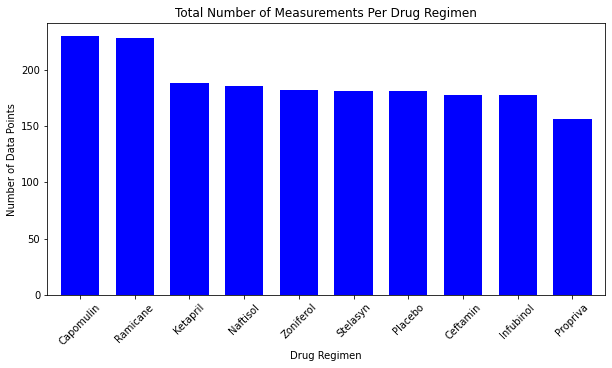

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_plot = mice_df['Drug Regimen'].value_counts().plot.bar(figsize=(10,5), 
                            title='Total Number of Measurements Per Drug Regimen',
                            xlabel='Drug Regimen',
                            ylabel='Number of Data Points',
                            rot=45,
                            color='b',
                            width=0.7)


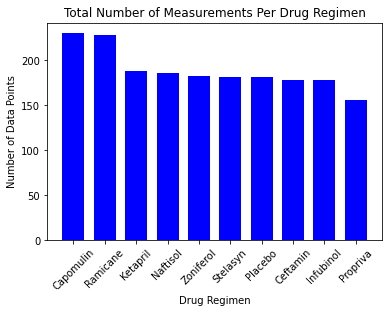

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_counts = mice_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(regimen_counts))
tick_locations = [value for value in x_axis]
drug_labels = regimen_counts.index.values

plt.bar(x_axis, regimen_counts, color='b', align='center', width=0.7)
plt.title('Total Number of Measurements Per Drug Regimen')
plt.xticks(tick_locations, drug_labels, rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

<AxesSubplot:title={'center':'Gender Distribution of Mice'}>

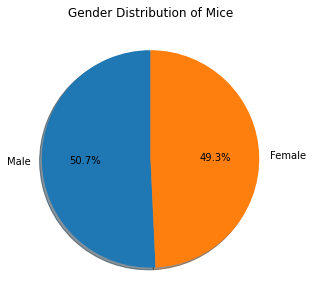

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mice_df['Sex'].value_counts()

gender_df.plot(kind='pie', figsize=(10,5), 
                           title='Gender Distribution of Mice',
                           startangle=90,
                           shadow=True,
                           autopct='%1.1f%%',
                           ylabel='')

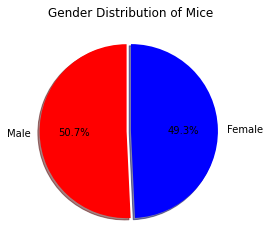

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = ['Male','Female'] 
genders = mice_df['Sex'].value_counts()
explode = (0.05, 0)
colors = ['red','blue']

plt.pie(genders, explode=explode, labels=gender_labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Gender Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(mice_df.groupby(['Mouse ID'])['Timepoint'].max().sort_values().reset_index().rename(columns={'Timepoint':'max_timepoint'}))

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_tumor = pd.merge(mice_df, max_tp, how='inner', on='Mouse ID')
max_tp_tumor.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
    
    drug_df = max_tp_tumor.loc[(max_tp_tumor['Drug Regimen'] == drug) & (max_tp_tumor['Timepoint'] == max_tp_tumor['max_timepoint'])]
    volume = drug_df['Tumor Volume (mm3)']
    tumor_volume_data.append(volume)
    
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_df = drug_df.loc[(drug_df['Tumor Volume (mm3)'] <= lower_bound) | (drug_df['Tumor Volume (mm3)'] >= upper_bound)]
    outlier = outlier_df['Tumor Volume (mm3)'].count()
    
    print(f'The IQR for {drug}: {round(iqr,3)}')
    print(f'The Lower Bound for {drug}: {round(lower_bound,3)}')
    print(f'The Upper Bound for {drug}: {round(upper_bound,3)}')
    print(f'Number of Outliers: {outlier}')
    print('')



The IQR for Capomulin: 7.782
The Lower Bound for Capomulin: 20.705
The Upper Bound for Capomulin: 51.832
Number of Outliers: 0

The IQR for Ramicane: 9.099
The Lower Bound for Ramicane: 17.913
The Upper Bound for Ramicane: 54.307
Number of Outliers: 0

The IQR for Infubinol: 11.477
The Lower Bound for Infubinol: 36.833
The Upper Bound for Infubinol: 82.741
Number of Outliers: 1

The IQR for Ceftamin: 15.578
The Lower Bound for Ceftamin: 25.355
The Upper Bound for Ceftamin: 87.666
Number of Outliers: 0



In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
